# Introduction

This notebook is a part of the scientific data processing I did between 2018 and 2019 at Dr. Gorostiza's laboratory at the Institute of Bioengineering for Catalonia.

This sample data is a small table (32.0 kB), however, data was usually recorded during longer period of time and would easily take up to GBs of space per file. Hence, the purpose of creating this Python code was to avoid extremely time-consuming and error-prone manual analysis done by Microsoft Excel.

The csv file presented in this notebook is one of the experimental results from a research project where I participated as a 2nd author. Current study has demonstrated a significant revolution in the photopharmacology field enabling micrometer scale of control in neuronal activity using light as a tool to switch on/off the function of proteins. The final manuscript of this project was published in 2019 and now [available online.](https://www.pnas.org/content/pnas/116/27/13680.full.pdf)
<br>
<br>
<br>

## Brief description about the experiment

*This is a very brief, simplified description for general public with limited domain knowledge. For further detail on the study, please refer to the original research paper [avaialble online.](https://www.pnas.org/content/116/27/13680)*

Freely-diffusible **photoswitches*** of brain receptors  were added to the bath solution where a tissue slice of rat brain was maintained alive. The brain tissue was then imaged+stimulated by different wavelenghts of light under a two-photon microscope. The data presented here contains time-series calcium detection from different segment of a neuron (of CA1 region of hippocampus) using flourescent probes.

* **Photoswitches**: Molecules that bind to its target receptors of which activities can be regulated by different wavelenghts of light. The compound used in below example is called ['Alloswitch'](https://www.abcam.com/alloswitch-1-mglu5-modulator-b147022.html?productWallTab=ShowAll) can induce intracellular calcium increase only when stimulated by either UV(405nm) or near-infrared(780nm)., which is known to selectively inhibit or disinhibit the activity of the metabotropic glutamate receptor mGlu5 in the presence of agonists (=molecules that activate its target receptor to produce biological responses). In this particular experiment, an agonist (DHPG) was co-applied with alloswitch in the bath.

Alloswitch only allows its target receptors to be activated when a 405nm or 780nm light is shed on it. In this notebook, only under 780nm (indicated as red boxes in plot 2-4), an increase of fluorescent signals (back lines) was detected.
<br>
<br>
<br>

## How the data is processed

Average fluorescence intensities for manually defined regions-of-interest (ROIs; e.g. different segments of a neuron) were exported by [Fiji](https://imagej.net/Fiji), an open source image processing package for scientific image analysis. The result table is to be imported as .csv file in this notebook. Then, fluorescence changes (dF = F-F0) at each timepoint relative to the first X frames of each series (F0) were calculated as (F-F0)/F0 and plotted.



* columns: Average flourescent signal recorded from each ROI (Region of Interest) are exported as 'Mean'.<br>
* rows: Sequence of image acquisition with varying time intervals (unit: seconds)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches   ## light box
%matplotlib inline

In [2]:
# Import data file (fluorence signals at different timepoint already exported by Fiji)
data=pd.read_csv("20190314-Exp13.csv", index_col=0, header=0)
print(data.shape)
data.head()

(180, 25)


,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,Mean10,...,Mean16,Mean17,Mean18,Mean19,Mean20,Mean21,Mean22,Mean23,Mean24,Mean25
,,,,,,,,,,,,,,,,,,,,,
1,99.44,83.06,95.80,147.35,265.05,397.34,425.87,450.18,466.56,448.36,...,723.39,559.44,674.82,640.19,503.62,252.33,291.11,253.51,208.01,212.89
2,76.40,82.46,78.81,158.26,287.50,402.17,448.93,455.02,440.44,482.96,...,712.47,580.07,715.50,609.85,527.90,229.27,275.34,240.15,207.98,212.26
3,76.99,77.61,85.48,140.08,282.05,440.44,453.18,423.46,439.21,456.24,...,736.75,602.57,685.75,606.79,513.31,254.75,267.45,244.40,198.30,198.33
4,89.12,83.06,98.21,157.06,243.80,401.58,461.68,441.68,428.90,442.88,...,753.75,593.45,717.92,591.01,495.09,242.63,266.26,240.78,186.75,208.03
5,77.00,73.36,82.45,158.27,271.72,416.18,439.25,443.49,492.64,462.92,...,733.72,583.73,694.24,610.44,501.16,262.05,266.84,219.53,206.79,209.24


In [3]:
# Acquisition rate varies depending on whether there was 780nm stimulation or not
# Imaged every 2 seconds when there was no 780nm stimulation
# Imaged every 0.66 seconds when there was 780nm stimulation

# Prepare np arrays of timepoints
first = np.arange(0, 60, 2) # First 30 rows (no 780nm): every 2 sec
second = np.arange(60, 119, 0.66) # Second 90 rows (780nm): every 0.66 sec
last = np.arange(120, 240, 2) # Last 60 rows (no 780nm): every 2 sec

# Append all the arrays
times = np.append(first, second)
times = np.append(times, last)

# Sanity check: are there 180 time points in total?
len(times)

180

In [4]:
# Substitue the index with the actual timestamps
data.index = times
data.head()

,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,Mean10,...,Mean16,Mean17,Mean18,Mean19,Mean20,Mean21,Mean22,Mean23,Mean24,Mean25
0.0,99.44,83.06,95.80,147.35,265.05,397.34,425.87,450.18,466.56,448.36,...,723.39,559.44,674.82,640.19,503.62,252.33,291.11,253.51,208.01,212.89
2.0,76.40,82.46,78.81,158.26,287.50,402.17,448.93,455.02,440.44,482.96,...,712.47,580.07,715.50,609.85,527.90,229.27,275.34,240.15,207.98,212.26
4.0,76.99,77.61,85.48,140.08,282.05,440.44,453.18,423.46,439.21,456.24,...,736.75,602.57,685.75,606.79,513.31,254.75,267.45,244.40,198.30,198.33
6.0,89.12,83.06,98.21,157.06,243.80,401.58,461.68,441.68,428.90,442.88,...,753.75,593.45,717.92,591.01,495.09,242.63,266.26,240.78,186.75,208.03
8.0,77.00,73.36,82.45,158.27,271.72,416.18,439.25,443.49,492.64,462.92,...,733.72,583.73,694.24,610.44,501.16,262.05,266.84,219.53,206.79,209.24


### Normalization of the signals


In [5]:
# Get the average values of the first 30 seconds (F0; baseline)
# to calculate fluorescence changes relative to baseline (dF/F0) for each ROI
means = data.iloc[:15].mean()
means

Mean1      85.972000
Mean2      74.491333
Mean3      87.627333
Mean4     149.576667
Mean5     261.730000
Mean6     413.812000
Mean7     438.297333
Mean8     429.527333
Mean9     455.050000
Mean10    460.770000
Mean11    367.074667
Mean12    392.080000
Mean13    544.104667
Mean14    663.108667
Mean15    841.632000
Mean16    725.576000
Mean17    579.801333
Mean18    696.550667
Mean19    619.260667
Mean20    499.921333
Mean21    241.689333
Mean22    267.620000
Mean23    244.204667
Mean24    195.218000
Mean25    206.572000
dtype: float64

In [6]:
# Normlize the flourescent signals (normF)
# F0: the average values of the first 30 seconds
# dF = F - F0: difference between the F0 and F at each timepoint
normF = data.sub(means).div(means)      #dF/F0
normF.head()

## Sanity check by manual calculation
# manually_calculated = (data['Mean1'] - means[0]) / means[0]
# (normF['Mean1'] - manually_calculated).sum()

,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,Mean10,...,Mean16,Mean17,Mean18,Mean19,Mean20,Mean21,Mean22,Mean23,Mean24,Mean25
0.0,0.156656,0.115029,0.093266,-0.014886,0.012685,-0.039806,-0.028354,0.048082,0.025294,-0.026933,...,-0.003013,-0.035118,-0.031198,0.033797,0.007398,0.044026,0.087774,0.038105,0.065527,0.030585
2.0,-0.111339,0.106974,-0.100623,0.058053,0.098460,-0.028134,0.024259,0.059351,-0.032106,0.048159,...,-0.018063,0.000463,0.027205,-0.015197,0.055966,-0.051386,0.028847,-0.016604,0.065373,0.027535
4.0,-0.104476,0.041866,-0.024505,-0.063490,0.077637,0.064348,0.033956,-0.014126,-0.034809,-0.009831,...,0.015400,0.039270,-0.015506,-0.020138,0.026782,0.054039,-0.000635,0.000800,0.015787,-0.039899
6.0,0.036617,0.115029,0.120769,0.050030,-0.068506,-0.029559,0.053349,0.028293,-0.057466,-0.038826,...,0.038830,0.023540,0.030679,-0.045620,-0.009664,0.003892,-0.005082,-0.014024,-0.043377,0.007058
8.0,-0.104360,-0.015187,-0.059084,0.058120,0.038169,0.005722,0.002174,0.032507,0.082606,0.004666,...,0.011224,0.006776,-0.003317,-0.014244,0.002478,0.084243,-0.002915,-0.101041,0.059277,0.012916


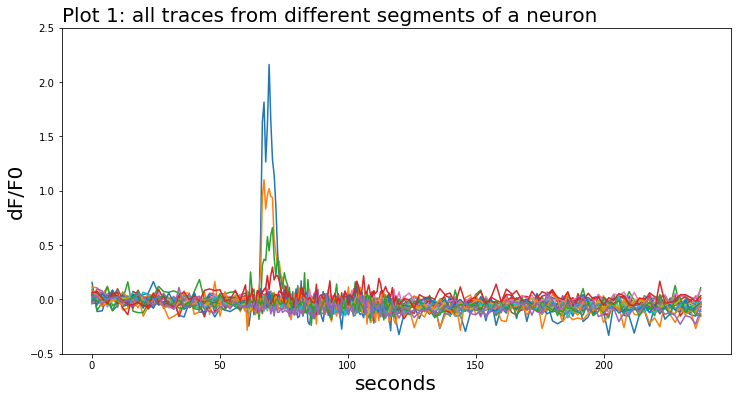

In [40]:
normF.plot(legend=False, ylim=[-0.5,2.5], figsize=(12,6), linewidth=1.5)
plt.title('Plot 1: all traces from different segments of a neuron', loc='left', fontsize=20)
plt.xlabel('seconds', fontsize=20)
plt.ylabel('dF/F0', fontsize=20)
plt.show()

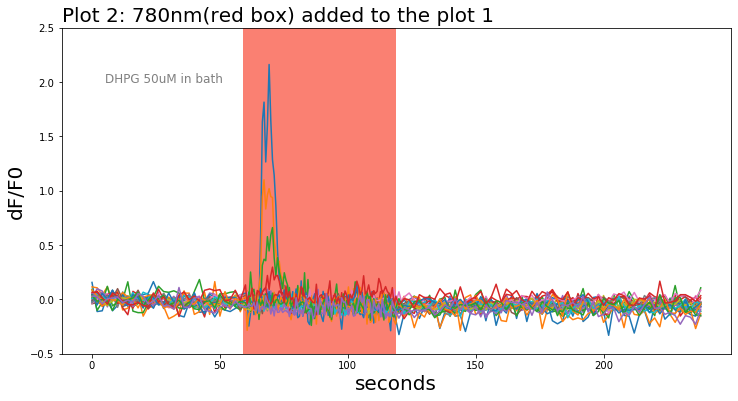

In [47]:
normF.plot(legend=False, ylim=[-0.5,2.5], figsize=(12,6), linewidth=1.5)
plt.title('Plot 2: 780nm(red box) added to the plot 1', loc='left', fontsize=20)
plt.xlabel('seconds', fontsize=20)
plt.ylabel('dF/F0', fontsize=20)


###### When a compound was added in the middle of the recording ######
### level = y value
### start-end : x (duration) of compound application

# level = 1.3
# activations = [
#     {'start':20,'end':3000, 'color':'grey'},
#     ]
#######################################################################

# label for compound in bath
plt.text(5, 2.0, 'DHPG 50uM in bath', color='grey', size=12)

# light (780nm)
plt.fill([59,59,119,119],[-3.0,12.0,12.0,-3.0], 'salmon')
plt.show()

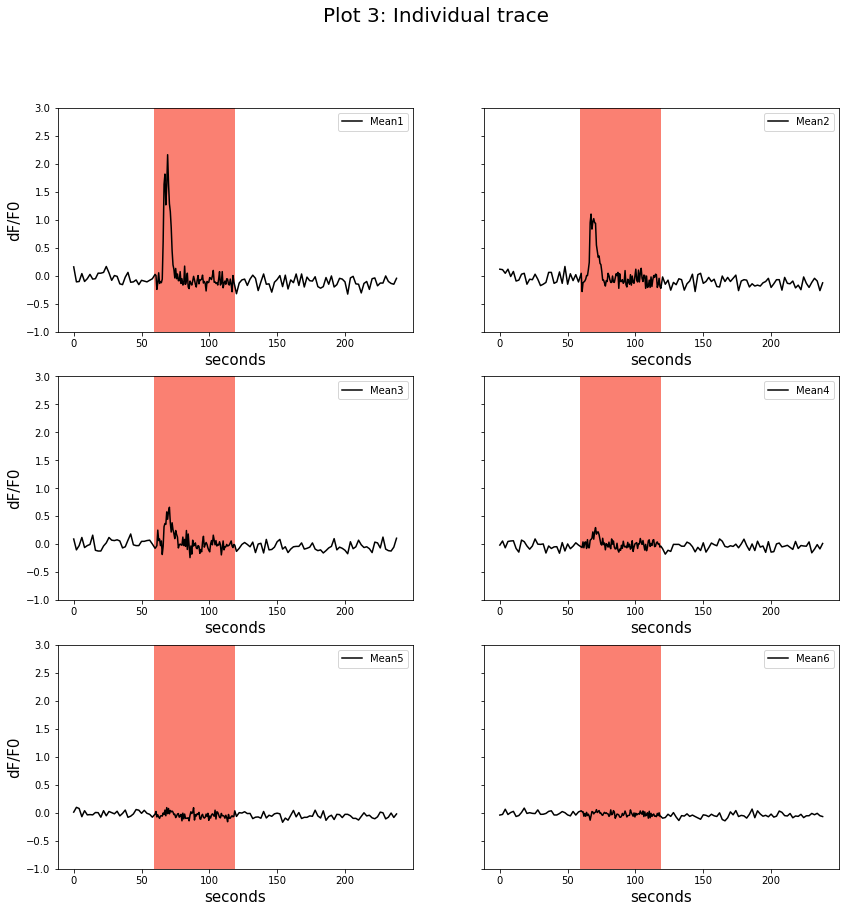

In [51]:
# Individual trace of the first 6 ROIs
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14), sharey=True)
plt.suptitle('Plot 3: Individual trace of 6 ROIs', fontsize=20)
cell = ["Mean%d" %x for x in range (1,7)]

for i, ax in enumerate(axes.reshape(-1)):
    ax = normF[cell[i]].plot(ax=ax, ylim=[-1.0, 3.0], color='black', legend=True)
    ax.set_xlabel('seconds', size=15)
    ax.set_ylabel('dF/F0', size=15)
    ax.add_patch(patches.Rectangle((59,-1.5), 60, 10, facecolor='salmon')) # 2PE

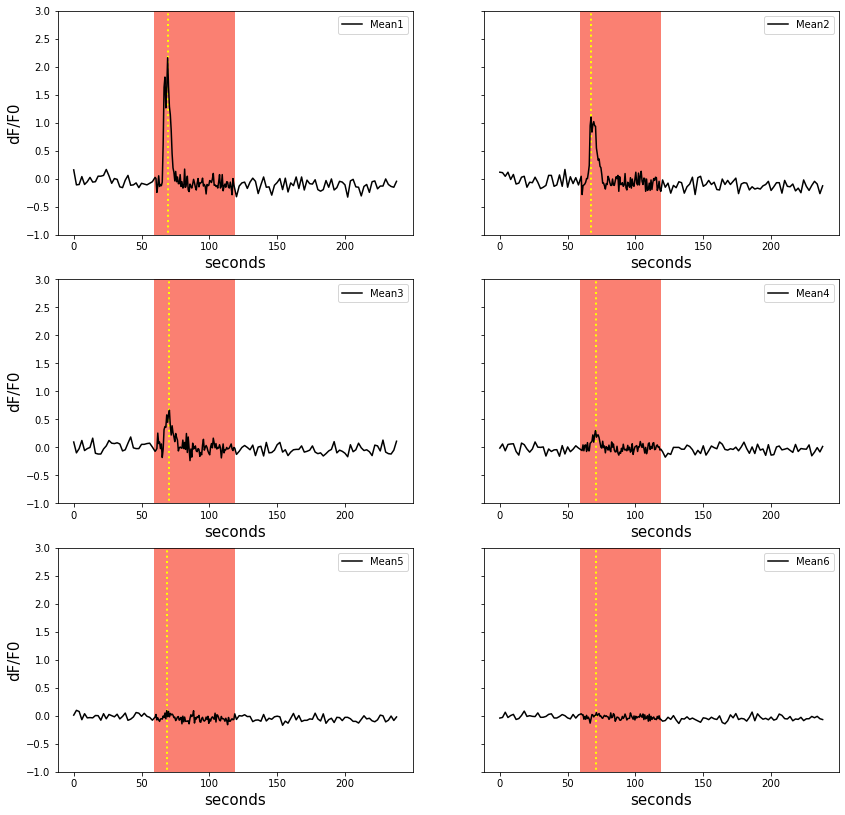

In [10]:


idxmax = normF[60:150].idxmax()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14), sharey=True)
plt.suptitle('Plot 4: Individual trace of 6 ROIs with is', fontsize=20)
cell = ["Mean%d" %x for x in range (1,7)]

for i, ax in enumerate(axes.reshape(-1)):
    ax = normF[cell[i]].plot(ax=ax, ylim=[-1.0, 3.0], color='black', legend=True)
    ax.set_xlabel('seconds', size=15)
    ax.set_ylabel('dF/F0', size=15)
    ax.add_patch(patches.Rectangle((59,-1.5), 60, 10, facecolor='salmon')) # 2PE
    ax.vlines(idxmax[i],-2,6, colors='yellow', linewidth=2, linestyles='dotted') # Where lies the max value

In [11]:
# Print the time when the max value appears from the first 4 ROIs
idxmax[:4]

Mean1    69.24
Mean2    67.26
Mean3    70.56
Mean4    70.56
dtype: float64

In [12]:
# Save the normalized data as a csv file
normF.to_csv('20190314-Exp13-normF.csv')